<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd

Download the webpage at the url


In [3]:
data  = requests.get(url).text 

Create a soup object


In [4]:
soup = BeautifulSoup(data,"html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

#Scrape the Language name and annual average salary
data = [] #create a list 
for row in table.find_all('tr'): 
    cols = row.find_all('td') # Get all columns in each row.
    Language_name = cols[1].getText() 
    annual_average_salary = cols[3].getText() 
    data.append([Language_name, annual_average_salary])

data

[['Language', 'Average Annual Salary'],
 ['Python', '$114,383'],
 ['Java', '$101,013'],
 ['R', '$92,037'],
 ['Javascript', '$110,981'],
 ['Swift', '$130,801'],
 ['C++', '$113,865'],
 ['C#', '$88,726'],
 ['PHP', '$84,727'],
 ['SQL', '$84,793'],
 ['Go', '$94,082']]

In [6]:
data_dict = {} #create a dictionary

#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

#Scrape the Language name and annual average salary
for row in table.find_all('tr'): 
    # Get all columns in each row.
    cols = row.find_all('td') 
    Language_name = cols[1].getText() 
    annual_average_salary = cols[3].getText() 
    
    # Add the Language name and annual average salary to the dictionary
    data_dict[Language_name] = annual_average_salary

print(data_dict)

{'Language': 'Average Annual Salary', 'Python': '$114,383', 'Java': '$101,013', 'R': '$92,037', 'Javascript': '$110,981', 'Swift': '$130,801', 'C++': '$113,865', 'C#': '$88,726', 'PHP': '$84,727', 'SQL': '$84,793', 'Go': '$94,082'}


Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# Save data to CSV file using pandas
df = pd.DataFrame(data, columns=['Language Name', 'Annual Average Salary'])
df.to_csv('popular-languages.csv', index=False)

In [37]:
salary = pd.read_csv('popular-languages.csv')
salary = salary.drop(0)
salary

,Language Name,Annual Average Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"
10,Go,"$94,082"


In [42]:
data = [['Python', '$114,383'],
        ['Java', '$101,013'],
        ['R', '$92,037'],
        ['Javascript', '$110,981'],
        ['Swift', '$130,801'],
        ['C++', '$113,865'],
        ['C#', '$88,726'],
        ['PHP', '$84,727'],
        ['SQL', '$84,793'],
        ['Go', '$94,082']]

df = pd.DataFrame(data, columns=['Language', 'Average Annual Salary'])
df['Average Annual Salary'] = df['Average Annual Salary'].replace({'\$': '', ',': ''}, regex=True)
df['Average Annual Salary'] = df['Average Annual Salary'].astype(int)

df

,Language,Average Annual Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


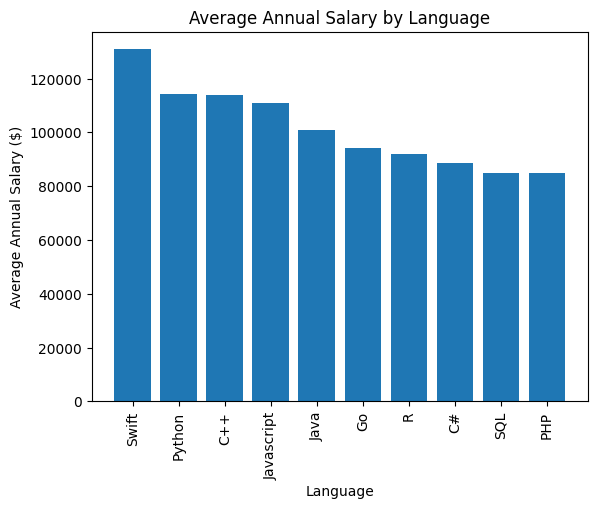

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_salary = df.sort_values('Average Annual Salary', ascending=False)
plt.bar(df_salary['Language'], df_salary['Average Annual Salary'])
plt.xticks(rotation=90)


plt.title('Average Annual Salary by Language')
plt.xlabel('Language')
plt.ylabel('Average Annual Salary ($)');

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
